# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../input/avito-category-prediction/train.csv')
test = pd.read_csv('../input/avito-category-prediction/test.csv')

In [3]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [4]:
train.isnull().sum()
# такс, у нас два пропуска в описаниях в датасете трейн

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [5]:
test.isnull().sum()
# и один пропуск в описаниях в датасете тест
# заполним пропуски пустой строкой

title          0
description    1
itemid         0
dtype: int64

In [6]:
train = train.fillna('')
test = test.fillna('')
# ща проверим
test.isnull().sum()
# работает
train.isnull().sum()
# и тут тоже все хорошо

title            0
description      0
Category_name    0
Category         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [7]:
train['information'] = train.title.map(str) + ' '
train['information'] = train.information.map(str) + train.description.map(str)
train.head()
# очень круто кегл не потянул по озу конкатенацию двух столбцов с пробелом и рестартнулся
# пришлось делать две операции вроде сработало но мне это уже не нравится

,title,description,Category_name,Category,information
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупом Возьму машину в аренду...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожки полусапожки в отличном состоянии, ..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаные Кожаные(натур) босоножки Kar...


In [9]:
test['information'] = test.title.map(str) + ' '
test['information'] = test.information.map(str) + test.description.map(str)
test.head()


,title,description,itemid,information
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,Мастерка Мастерка фирмы форвард. Белого цвета....
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапоги Продаю зимние сапоги, в хорошем ..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камер В комплект Atis AMD-2M...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLE Запчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerf Состояние 5+/\nПродаю потому что ...


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [10]:
train['Category'].unique()
# ок у нас 50 уникальных классов


array([ 10,  21, 114,  27,  29,   9, 112,  39,  90,  20,  94,  36,  99,
       101,  84,  19,  30,  82,  32,  81,  24,  87, 111,  93,  42,  28,
        40, 105,  97,  83,  38,  88,  96,  25,  85,  26, 102, 106,  11,
        34,  31,  98,  14,  23,  89,  91,  92, 116,  33,  86])

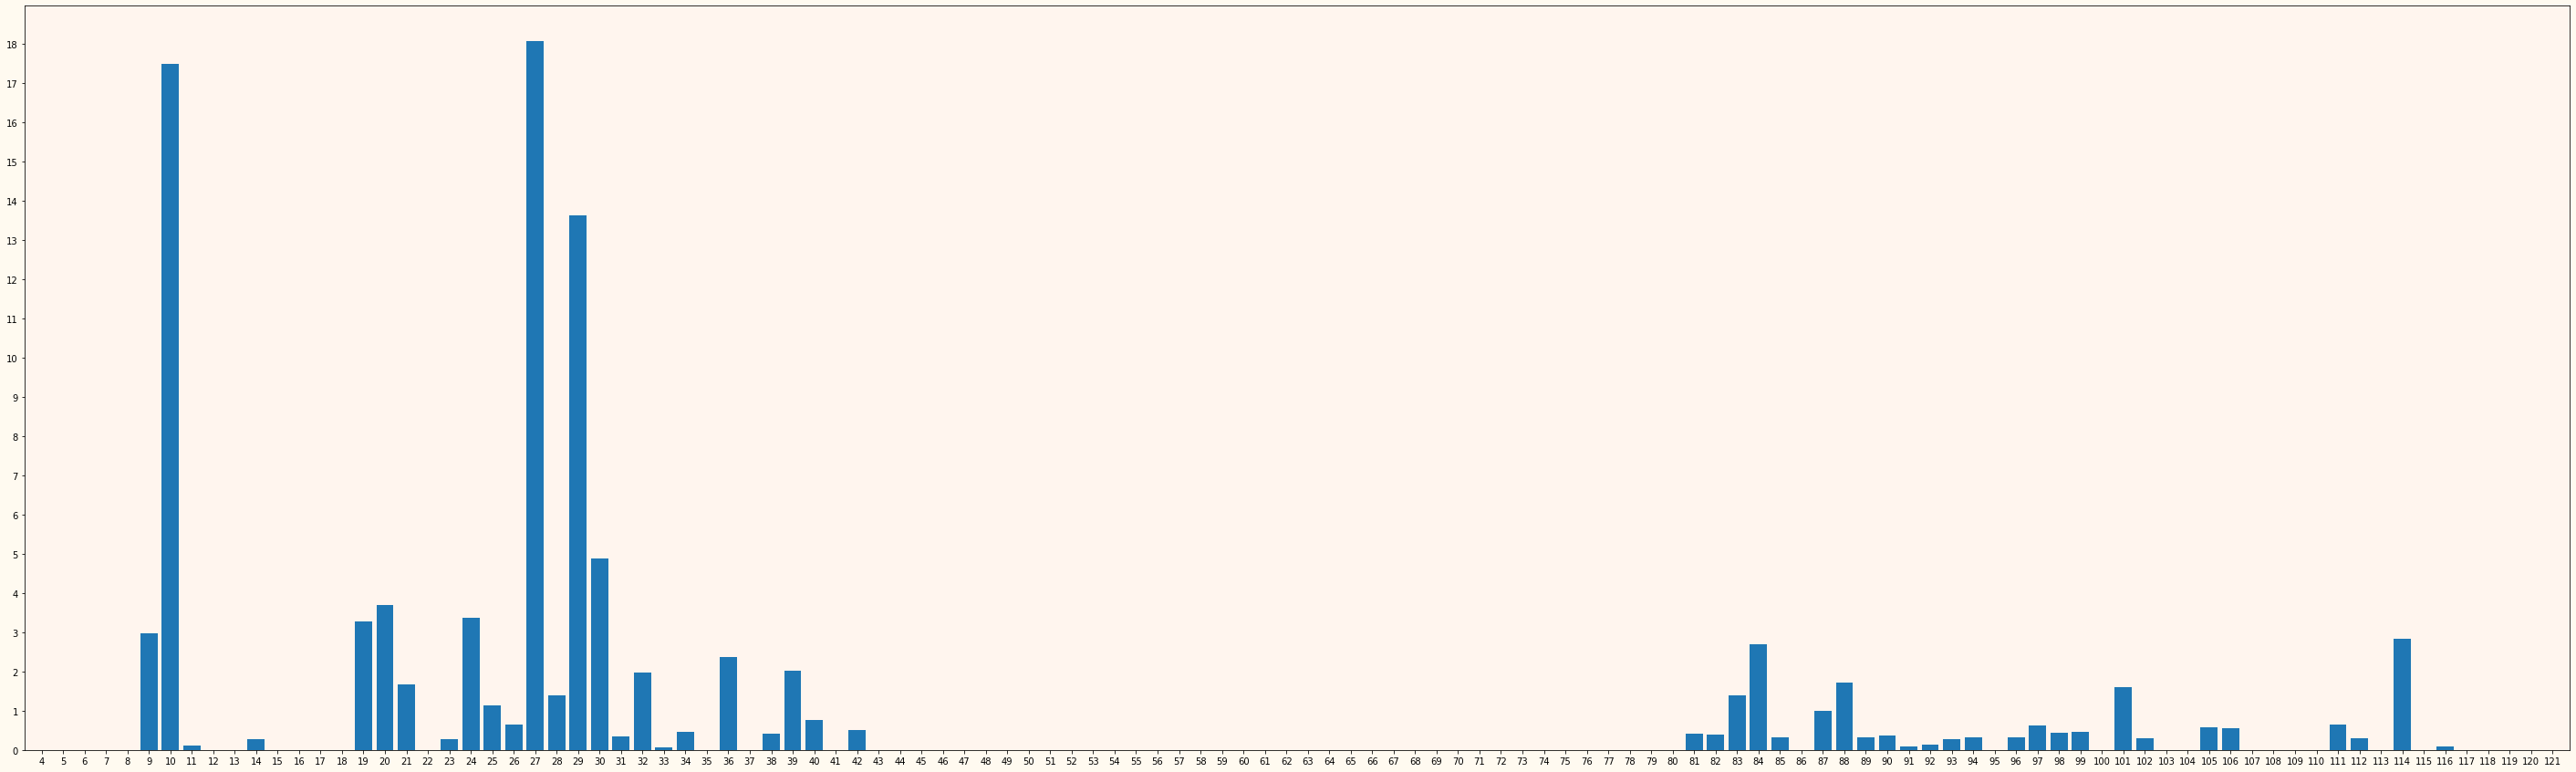

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# поместим отсортированный список категорий в ось икс, потому что value_counts()
# возвращает отсортированный список
a = ([27, 10, 29, 30, 20, 24, 19, 9, 114, 84, 36, 39, 32, 88, 21, 101, 83, 28, 25, 87, 40, 111, 26, 97, 105, 106, 42, 34, 99, 98, 38, 81, 82, 90, 31, 89, 96, 85, 94, 112, 102, 93, 14, 23, 92, 11, 116, 91, 33, 86])

x = a
y = train['Category'].value_counts() / len(train['Category']) * 100
# строкой выше нормализация до процентов

fig, ax = plt.subplots()

ax.bar(x, y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
# двумя строками выше поставил деления осей
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(50)    #  ширина Figure
fig.set_figheight(15)    #  высота Figure
# если график в слишком мелком масштабе, щелкните по нему два раза
# по оси икс уникальный идентификатор категории
# по оси игрек проценты

plt.show()

In [12]:
train['Category'].value_counts() / len(train['Category']) * 100
# так ага мы посмотрели проценты

27     18.070676
10     17.493946
29     13.639425
30      4.877538
20      3.701829
24      3.359343
19      3.275617
9       2.970637
114     2.837761
84      2.684999
36      2.376122
39      2.016253
32      1.968143
88      1.711013
21      1.675420
101     1.607873
83      1.394767
28      1.391814
25      1.139195
87      1.004714
40      0.758991
111     0.640263
26      0.638066
97      0.621746
105     0.585398
106     0.545885
42      0.517945
34      0.460269
99      0.459892
98      0.435896
38      0.413789
81      0.405452
82      0.401201
90      0.364663
31      0.352406
89      0.323875
96      0.323568
85      0.314758
94      0.313554
112     0.308193
102     0.287409
93      0.280465
14      0.279804
23      0.275836
92      0.123546
11      0.115233
116     0.097401
91      0.085356
33      0.068162
86      0.003897
Name: Category, dtype: float64

In [13]:
# а теперь мы посмотрим в какой категории меньше всего объявлений
# для этого я напишу групбаи по категори и категори_нейм в обе стороны и посмотрю))))))))) 
train.groupby("Category")["Category_name"].count().head(50)
# так, категория 86 имеет всего 165 объявлений, теперь посмотрим как называется категория
# которая имеет 165 объявлений


Category
9      125778
10     740701
11       4879
14      11847
19     138691
20     156737
21      70938
23      11679
24     142236
25      48234
26      27016
27     765120
28      58930
29     577499
30     206517
31      14921
32      83332
33       2886
34      19488
36     100606
38      17520
39      85369
40      32136
42      21930
81      17167
82      16987
83      59055
84     113684
85      13327
86        165
87      42540
88      72445
89      13713
90      15440
91       3614
92       5231
93      11875
94      13276
96      13700
97      26325
98      18456
99      19472
101     68078
102     12169
105     24786
106     23113
111     27109
112     13049
114    120152
116      4124
Name: Category_name, dtype: int64

In [14]:
train.groupby("Category_name")["Category"].count().head(50)
# Недвижимость за рубежом, окей

Category_name
Автомобили                      125778
Аквариум                          5231
Аудио и видео                    83332
Билеты и путешествия              2886
Бытовая техника                  70938
Вакансии                         27109
Велосипеды                       19488
Водный транспорт                  4879
Гаражи и машиноместа             13327
Готовый бизнес                    4124
Грузовики и спецтехника          17167
Детская одежда и обувь          577499
Дома, дачи, коттеджи             48234
Другие животные                  11875
Запчасти и аксессуары           740701
Земельные участки                27016
Игры, приставки и программы      26325
Квартиры                        142236
Книги и журналы                  59055
Коллекционирование              100606
Коммерческая недвижимость        21930
Комнаты                          11679
Кошки                            15440
Красота и здоровье               72445
Мебель и интерьер               156737
Мотоциклы и

Выполним третью часть задания. Наибольшие доли имеют три класса: 27, 10, 29. Класс 27 имеет наибольшую долю из всех: примерно 18,07%, он отображает долю "Одежда, обувь, аксессуары". Класс 86 имеет наименьшую долю: примерно 0,004%, это недвижимость за рубежом. Анализируя дисбаланс, видно, что три категории весят больше 49 процентов, остальные 47 категорий чуть больше 50. Итого, почти половину всех объявлений составляют объявления о продаже одежды и запчастей-аксессуаров. Также есть достаточно много классов с долями 1-5 процентов.

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [16]:
# сначала подрежем датасет
train1 = train.sample(100000, random_state=0)
# Я уже знаю, какой способ обучения лучше всего, поэтому запущу на всех остальных 100к,
# а на лучшем 500

In [19]:
train_final = train.sample(500000, random_state=0)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(train1['information'])

X
# это версия с 100к строк
# 100000*229866

<100000x229866 sparse matrix of type '<class 'numpy.int64'>'
	with 3569495 stored elements in Compressed Sparse Row format>

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [21]:
isNumber = 0
for i in cnt_vec.vocabulary_:
    if i[0].isdigit():
        isNumber += 1

print(isNumber)



# ну ок, 33355

33355


In [22]:
isSymbol = 0
for i in cnt_vec.vocabulary_:
    if i[0] in (r'[!"#$%&\'()*+,-.\/:;<=>?@\[\\\]^_`{|}~]'): 
        isSymbol += 1
print(isSymbol)
# угу, 200, хорошо

200


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [23]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# так стоп, надо функцию, это первое, запустить ее надо на первом описании ладно

symbols = re.compile(r'\W')
digits = re.compile(r'\d')
stemmer = SnowballStemmer('russian')

def outGarbage(vocab):
    for i in vocab:
        if i in symbols.findall(vocab):
            return not i
        elif i in digits.findall(vocab):
            return not i
        elif i in stopwords.words('russian'):
            return not i
        else:
            return i

# минут 40 пытался вспомнить работу логических выражений так чтобы
# работало, пришлось писать три разных

def tokenized(vocab):
    vocab = filter(outGarbage, word_tokenize(vocab.lower()))
    return [stemmer.stem(w) for w in vocab]

print(list(tokenized(train1.iat[0,4])))

['прода', 'детск', 'практическ', 'не', 'цвет', 'на', 'фот', 'за', 'так', 'ест', 'бортик', 'матрас']


## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
my_cnt_vec = CountVectorizer(tokenizer=tokenized)
X = my_cnt_vec.fit_transform(train_final['information'])
X







<500000x401170 sparse matrix of type '<class 'numpy.int64'>'
	with 10216388 stored elements in Compressed Sparse Row format>

In [57]:
# теперь разобьем, поскольку таргетная переменная лежит в отдельном датасете,
# доставать все будем ручками и очень аккуратно, нужно знать, что каждый вектор
# каунтВекторайзера будет сопоставлен строго со своей категорией, которую надо достать из
# train1['Category']
# рандомайзер мы уже использовали, нам не нужен еще один

Y_test = train_final['Category'][:100000]
Y_train = train_final['Category'][100000:]
X_test = X[:100000]
X_train = X[100000:]

# окей, матрица разбита 80/20, таргетная переменная разбита 80/20
# можно АНАЛИЗИРОВАТЬ


In [92]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

sgdc = SGDClassifier(max_iter=500000, tol=0.001)
print(sgdc)
 
sgdc.fit(X_train, Y_train)



SGDClassifier(max_iter=500000)


SGDClassifier(max_iter=500000)

In [93]:
from sklearn.metrics import accuracy_score
Y_pred = sgdc.predict(X_test)
score = accuracy_score(Y_test, Y_pred)
print("Training score: ", score) 
# получили 0.79608 на 500к строк, выглядит как шанс получить бонус, отлично
# Я эмпирически выяснил, что стохастический градиентный спуск работает лучше
# на 50к и на 100к строк, я не могу 8-9 задания на 500к пересчитывать, так что перейду к 10
# в 8-9 останутся 100к строк

Training score:  0.79766


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=tokenized)
X_td = tfidf_vec.fit_transform(train1['information'])

X_td

<100000x136446 sparse matrix of type '<class 'numpy.float64'>'
	with 2047231 stored elements in Compressed Sparse Row format>

In [47]:
# Y_train и Y_test прежние

Y_td_test = train1['Category'][:20000]
Y_td_train = train1['Category'][20000:]
X_td_test = X_td[:20000]
X_td_train = X_td[20000:]

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

sgdc_td = SGDClassifier(max_iter=100000, tol=0.001)
print(sgdc_td)
 
sgdc_td.fit(X_td_train, Y_td_train)

# SGDC обучен

SGDClassifier(max_iter=100000)


SGDClassifier(max_iter=100000)

In [49]:
Y_td_pred = sgdc_td.predict(X_td_test)
score = accuracy_score(Y_td_test, Y_td_pred)
print("Training score: ", score) 
# 0.7671, ну похуже чуток

Training score:  0.76675


In [50]:
# теперь попробуем убрать близкие к единице значения
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(tokenizer=tokenized, max_df = 0.9)
X_td_nine = tfidf_vec.fit_transform(train1['information'])

X_td_nine

# матрица не поменялась, ну неудивительно, пунктуацию и стопворды убрал,
# а больше у нас нет кандидатов на 90%+ частоту появления

<100000x136446 sparse matrix of type '<class 'numpy.float64'>'
	with 2047231 stored elements in Compressed Sparse Row format>

In [52]:
# понятно, что ничего не изменится, но для формы посчитаем
# Y_train и Y_test прежние

Y_td_nine_test = train1['Category'][:20000]
Y_td_nine_train = train1['Category'][20000:]
X_td_nine_test = X_td_nine[:20000]
X_td_nine_train = X_td_nine[20000:]

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

sgdc_td_nine = SGDClassifier(max_iter=100000, tol=0.001)
print(sgdc_td_nine)
 
sgdc_td_nine.fit(X_td_nine_train, Y_td_nine_train)

# SGDC обучен

SGDClassifier(max_iter=100000)


SGDClassifier(max_iter=100000)

In [54]:
Y_td_nine_pred = sgdc_td_nine.predict(X_td_nine_test)
score = accuracy_score(Y_td_nine_test, Y_td_nine_pred)
print("Training score: ", score) 
# результат повыше: 0.7673
# обусловлено, скорее всего, тем, что это второй прогон классифайера

Training score:  0.7676


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [33]:
from sklearn.feature_extraction.text import HashingVectorizer
feat_cnt_vec = HashingVectorizer(tokenizer=tokenized, n_features=30000)
X_feat = feat_cnt_vec.fit_transform(train1['information'])
X_feat

# построил каунт векторайзер

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


<100000x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 2045723 stored elements in Compressed Sparse Row format>

In [38]:
# Y_train и Y_test прежние

Y_feat_test = train1['Category'][:20000]
Y_feat_train = train1['Category'][20000:]
X_feat_test = X_feat[:20000]
X_feat_train = X_feat[20000:]

In [42]:
sgdc_feat = SGDClassifier(max_iter=10000, tol=0.01)
print(sgdc_feat)
 
sgdc_feat.fit(X_feat_train, Y_feat_train)

# SGDC обучен

SGDClassifier(max_iter=10000, tol=0.01)


SGDClassifier(max_iter=10000, tol=0.01)

In [43]:
Y_feat_pred = sgdc_feat.predict(X_feat_test)
score = accuracy_score(Y_feat_test, Y_feat_pred)
print("Training score: ", score) 
# 0.7673, ну ок

Training score:  0.7426


Лучший результат был достигнут в 7 задании со стохастическим градиентным спуском, его используем в 10.

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [55]:
Test = my_cnt_vec.transform(test['information'])

In [61]:
Y_prediction = sgdc.predict(Test)

In [86]:
# вроде все выглядит как должно..
final = {'Id': test['itemid'], 'Category': Y_prediction}
final_data = pd.DataFrame(final, columns = ['Id', 'Category'])

# УРА ВСЕ ВЫГЛЯДИТ КАК ДОЛЖНО

In [88]:
final_data.to_csv(r'random_preds.csv', index=False)
